In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mutual_info_score

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/leads-dataset/Leads.csv')

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Data preprocessing
#lowerCase the columns names 
df.columns = df.columns.str.lower().str.replace(' ', '_')

#select columns with string values 
string_columns = list(df.dtypes[df.dtypes == object].index)
df[string_columns] = df[string_columns].apply(lambda x: x.str.lower().str.replace(' ', '_'))

In [7]:
df.isnull().sum()

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   1438
how_did_you_hear_about_x_education               2207
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article           

# Handeling missing values
* Mode for categorical variables
* Mean for numerical variables

In [10]:
categorical = ['lead_origin', 'lead_source', 'do_not_email', 'do_not_call', 'last_activity', 'country',
                'specialization', 'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
                'tags', 'lead_quality', 'lead_profile', 'city', 'asymmetrique_activity_index',
                'asymmetrique_profile_index', 'a_free_copy_of_mastering_the_interview', 'last_notable_activity']
numerical = ['totalvisits', 'total_time_spent_on_website', 'page_views_per_visit', 'asymmetrique_activity_score',
             'asymmetrique_profile_score']

In [11]:
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode()[0])
for num in numerical:
    df[num] = df[num].fillna(df[num].mean())

# Feature Importance

In [12]:
def calculate_mi(series):
    return mutual_info_score(series,df.converted)

In [13]:
df_mi = df[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name="MI")
df_mi

,MI
tags,0.206630
lead_quality,0.107821
last_activity,0.084493
lead_profile,0.082869
last_notable_activity,0.073860
lead_source,0.061560
lead_origin,0.056251
what_is_your_current_occupation,0.053389
specialization,0.014624
city,0.012024


In [14]:
df.drop(columns=['do_not_call', 'through_recommendations', 'what_matters_most_to_you_in_choosing_a_course',
                 'digital_advertisement', 'newspaper_article', 'search', 'receive_more_updates_about_our_courses',
                 'update_me_on_supply_chain_content', 'magazine', 'i_agree_to_pay_the_amount_through_cheque'], inplace=True)

# Correlation Coefficient

In [15]:
df[numerical].corrwith(df.converted)

totalvisits                    0.030091
total_time_spent_on_website    0.362483
page_views_per_visit          -0.003294
asymmetrique_activity_score    0.123491
asymmetrique_profile_score     0.160700
dtype: float64

In [18]:
# New categorical columns after feature selection
new_categorical = ['lead_origin', 'lead_source', 'do_not_email', 'last_activity', 'country', 'specialization',
                    'how_did_you_hear_about_x_education', 'what_is_your_current_occupation', 'tags', 'lead_quality',
                    'lead_profile', 'city', 'asymmetrique_activity_index', 'asymmetrique_profile_index',
                    'a_free_copy_of_mastering_the_interview', 'last_notable_activity']

In [19]:
# Train-test split
X = df[new_categorical + numerical]
y = df['converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
# DictVectorizer and StandardScaler
dv = DictVectorizer(sparse=False)
X_train_encoded = dv.fit_transform(X_train.to_dict(orient='records'))
X_test_encoded = dv.transform(X_test.to_dict(orient='records'))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [21]:
# Logistic Regression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [22]:
# Model evaluation on the test set
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

In [23]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

Accuracy: 0.9312770562770563
Precision: 0.923943661971831
Recall: 0.8998628257887518
ROC AUC: 0.9745553483844948


In [24]:
# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [25]:
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[1065   54]
 [  73  656]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      1119
           1       0.92      0.90      0.91       729

    accuracy                           0.93      1848
   macro avg       0.93      0.93      0.93      1848
weighted avg       0.93      0.93      0.93      1848



In [26]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])

In [27]:
# Visualizations
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(50.722222222222214, 0.5, 'Actual')

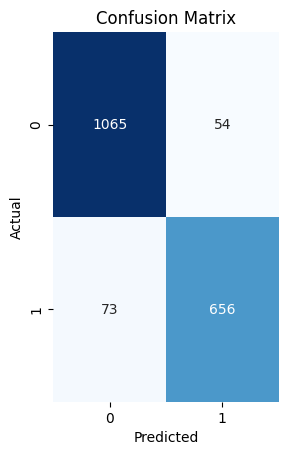

In [28]:
# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

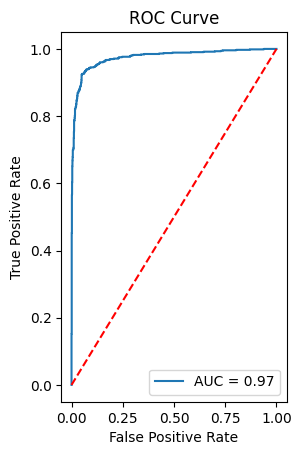

In [29]:
# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [ ]:
plt.tight_layout()
plt.show()

In [30]:
# Create a sample DataFrame for testing the model
sample_data = {
    'lead_origin': ['api', 'landing_page_submission'],
    'lead_source': ['google', 'direct_traffic'],
    'do_not_email': ['no', 'yes'],
    'last_activity': ['email_opened', 'sms_sent'],
    'country': ['india', 'uae'],
    'specialization': ['finance_management', 'human_resource_management'],
    'how_did_you_hear_about_x_education': ['word_of_mouth', 'other'],
    'what_is_your_current_occupation': ['working_professional', 'student'],
    'tags': ['interested_in_mba', 'will_revert_after_reading_the_email'],
    'lead_quality': ['not_enough_information', 'high'],
    'lead_profile': ['potential_lead', 'other_lead'],
    'city': ['mumbai', 'unknown'],
    'asymmetrique_activity_index': ['02.Medium', '01.High'],
    'asymmetrique_profile_index': ['02.Medium', '01.High'],
    'a_free_copy_of_mastering_the_interview': ['yes', 'no'],
    'last_notable_activity': ['modified', 'email_bounced'],
    'totalvisits': [10, 5],
    'total_time_spent_on_website': [150, 80],
    'page_views_per_visit': [3, 2],
    'asymmetrique_activity_score': [16, 14],
    'asymmetrique_profile_score': [16, 15],
    # Add other columns used in preprocessing
    'prospect_id': ['1', '2'],
    'do_not_call': ['no', 'yes'],
    'what_matters_most_to_you_in_choosing_a_course': ['better Career Prospects', 'Flexibility & Convenience'],
    'search': ['no', 'yes'],
    'magazine': ['no', 'yes'],
    'newspaper_article': ['no', 'yes'],
    'x_education_forums': ['no', 'yes'],
    'newspaper': ['no', 'yes'],
    'digital_advertisement': ['no', 'yes'],
    'through_recommendations': ['no', 'yes'],
    'receive_more_updates_about_our_courses': ['no', 'yes'],
    'update_me_on_supply_chain_content': ['no', 'yes'],
    'get_updates_on_dm_content': ['no', 'yes'],
    'i_agree_to_pay_the_amount_through_cheque': ['no', 'yes']
}

# Convert the sample data to a DataFrame
sample_df = pd.DataFrame(sample_data)

# Apply the same preprocessing to the sample data
sample_df.columns = sample_df.columns.str.lower().str.replace(' ', '_')

for cat in categorical:
    sample_df[cat] = sample_df[cat].fillna(sample_df[cat].mode()[0])
for num in numerical:
    sample_df[num] = sample_df[num].fillna(sample_df[num].mean())

# Apply DictVectorizer and StandardScaler
sample_encoded = dv.transform(sample_df.to_dict(orient='records'))
sample_scaled = scaler.transform(sample_encoded)

# Make predictions using the trained model
sample_predictions = model.predict(sample_scaled)

# Display the predictions
sample_df['converted'] = sample_predictions
print("Sample Predictions:\n", sample_df[['lead_origin', 'lead_source', 'converted']])

Sample Predictions:
                lead_origin     lead_source  converted
0                      api          google          1
1  landing_page_submission  direct_traffic          1
